In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 0. Importing Libraries


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Importing the warnings module
import warnings

# Ignoring warnings
warnings.filterwarnings('ignore')

# 1. Data Understanding and Exploration

## 1.1 Reading the Data

In [3]:
# Read the data
df = pd.read_csv("/content/drive/MyDrive/Artificial Intelligence (CSE422) /Artificial Intelligence (CSE422)/data.csv")

# Renmaing column names
df.columns = ["posted_by", "under_construction", "rera", "number_of_bhk", 
              "type", "sq_ft", "ready_to_move", "resale", "address", "lng", "lat", "price"]
              
df.head(5)

posted_by  under_construction  rera  number_of_bhk type        sq_ft  \
0     Owner                   0     0              2  BHK  1300.236407   
1    Dealer                   0     0              2  BHK  1275.000000   
2     Owner                   0     0              2  BHK   933.159722   
3     Owner                   0     1              2  BHK   929.921143   
4    Dealer                   1     0              2  BHK   999.009247   

   ready_to_move  resale                      address        lng        lat  \
0              1       1        Ksfc Layout,Bangalore  12.969910  77.597960   
1              1       1    Vishweshwara Nagar,Mysore  12.274538  76.644605   
2              1       1             Jigani,Bangalore  12.778033  77.632191   
3              1       1  Sector-1 Vaishali,Ghaziabad  28.642300  77.344500   
4              0       1             New Town,Kolkata  22.592200  88.484911   

   price  
0   55.0  
1   51.0  
2   43.0  
3   62.5  
4   60.5

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   posted_by           29451 non-null  object 
 1   under_construction  29451 non-null  int64  
 2   rera                29451 non-null  int64  
 3   number_of_bhk       29451 non-null  int64  
 4   type                29451 non-null  object 
 5   sq_ft               29451 non-null  float64
 6   ready_to_move       29451 non-null  int64  
 7   resale              29451 non-null  int64  
 8   address             29451 non-null  object 
 9   lng                 29451 non-null  float64
 10  lat                 29451 non-null  float64
 11  price               29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [5]:
df.describe()

under_construction          rera  number_of_bhk         sq_ft  \
count        29451.000000  29451.000000   29451.000000  2.945100e+04   
mean             0.179756      0.317918       2.392279  1.980217e+04   
std              0.383991      0.465675       0.879091  1.901335e+06   
min              0.000000      0.000000       1.000000  3.000000e+00   
25%              0.000000      0.000000       2.000000  9.000211e+02   
50%              0.000000      0.000000       2.000000  1.175057e+03   
75%              0.000000      1.000000       3.000000  1.550688e+03   
max              1.000000      1.000000      20.000000  2.545455e+08   

       ready_to_move        resale           lng           lat         price  
count   29451.000000  29451.000000  29451.000000  29451.000000  29451.000000  
mean        0.820244      0.929578     21.300255     76.837695    142.898746  
std         0.383991      0.255861      6.205306     10.557747    656.880713  
min         0.000000      0.000000    -37.713008   -121.761248      0.250000  
25%         1.000000      1.000000     18.452663     73.798100     38.000000  
50%         1.000000      1.000000     20.750000     77.324137     62.000000  
75%         1.000000      1.000000     26.900926     77.828740    100.000000  
max         1.000000      1.000000     59.912884    152.962676  30000.000000

## 1.2 Assessing Data Quality

### 1.2.1 Missing Values

There are no missing values for all the columns in the dataframe.

In [6]:
df.isnull().sum()

posted_by             0
under_construction    0
rera                  0
number_of_bhk         0
type                  0
sq_ft                 0
ready_to_move         0
resale                0
address               0
lng                   0
lat                   0
price                 0
dtype: int64

### 1.2.2 Identifying and Handling Outliers


Before removing outliers, the size of data is: (29451, 12)
After removing outliers, the size of data is: (26367, 12)


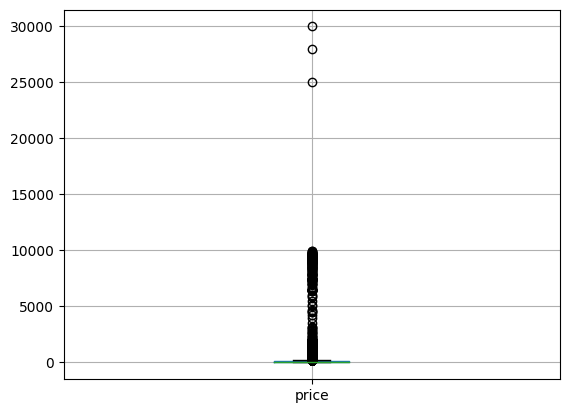

In [7]:
# Plotting the Box Plot
%matplotlib inline
boxplot = df.boxplot(column=['price'])  

Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

print('Before removing outliers, the size of data is:', df.shape)
df = df[~((df['price'] < (Q1 - 1.5 * IQR)) | (df['price'] > (Q3 + 1.5 * IQR)))]
print('After removing outliers, the size of data is:', df.shape)

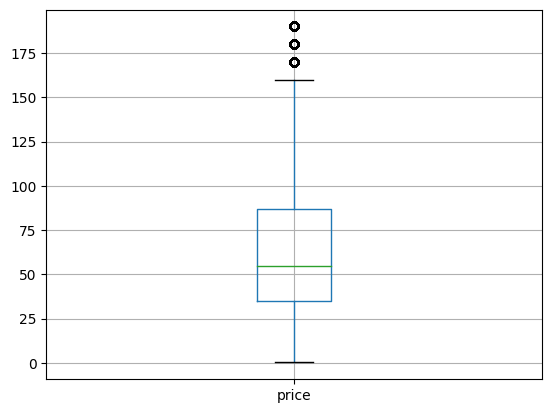

In [8]:
# Plotting the Box Plot after removing Outliers
%matplotlib inline
boxplot = df.boxplot(column=['price'])  

### 1.2.3 Duplicate Values

After removing the duplicates the number of rows is 26,005

In [9]:
df = df.drop_duplicates()
print('After dropping the duplicates, the shape of data:', df.shape)

After dropping the duplicates, the shape of data: (26005, 12)


## 1.3 Data Visualization

### 1.3.1 Understanding the distribution of house prices (Historgram)

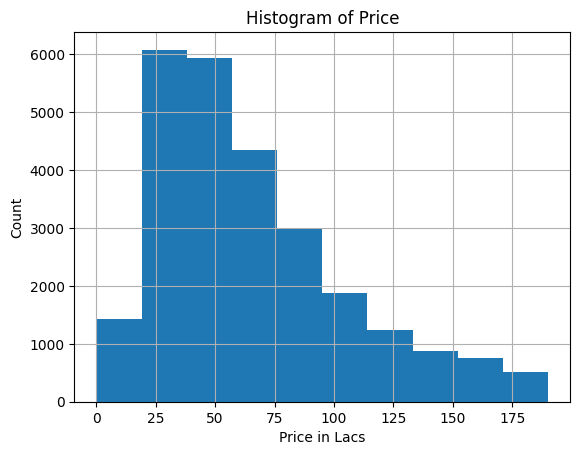

In [10]:
df['price'].hist(bins=10)

plt.xlabel('Price in Lacs')
plt.ylabel('Count')
plt.title('Histogram of Price')

# show the plot
plt.show()

### 1.3.2 Distribution of House Square Feet (Histogram)

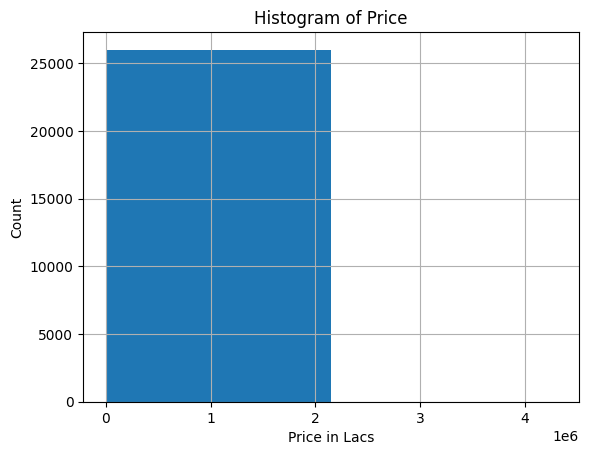

In [11]:
df['sq_ft'].hist(bins=2)

plt.xlabel('Price in Lacs')
plt.ylabel('Count')
plt.title('Histogram of Price')

# show the plot
plt.show()

# 2. Data Preprocessing

## 2.1 Label Encoding and Removing Unnecessary Features





In [12]:
# Label Encoding -> 'posted_by' and 'type'
encoder = LabelEncoder()

encoder.fit(df["posted_by"])
df["posted_by"] = encoder.transform(df["posted_by"])

encoder.fit(df["type"])
df["type"] = encoder.transform(df["type"])

# Removing the address column
df = df.drop('address', axis=1)
df.head(10)

posted_by  under_construction  rera  number_of_bhk  type        sq_ft  \
0          2                   0     0              2     0  1300.236407   
1          1                   0     0              2     0  1275.000000   
2          2                   0     0              2     0   933.159722   
3          2                   0     1              2     0   929.921143   
4          1                   1     0              2     0   999.009247   
5          2                   0     0              3     0  1250.000000   
6          1                   0     0              3     0  1495.053957   
7          2                   0     1              3     0  1181.012946   
8          1                   0     1              2     0  1040.000000   
9          2                   0     1              2     0   879.120879   

   ready_to_move  resale        lng        lat  price  
0              1       1  12.969910  77.597960   55.0  
1              1       1  12.274538  76.644605   51.0  
2              1       1  12.778033  77.632191   43.0  
3              1       1  28.642300  77.344500   62.5  
4              0       1  22.592200  88.484911   60.5  
5              1       1  10.033280  76.282571   42.0  
6              1       1  26.916347  75.795600   66.5  
7              1       1  30.740000  76.650000   52.0  
8              1       1  13.054202  77.674002   41.6  
9              1       1  12.951610  80.140970   36.0

## Test - Converting to classification

In [13]:
for idx, row in df.iterrows():

  price = row["price"]

  if price > 0 and price < 30:
    df.at[idx,'price'] = 1

  elif price >= 30 and price < 60:
    df.at[idx,'price'] = 2

  elif price >= 60 and price < 90:
    df.at[idx,'price'] = 3

  elif price >= 90 and price < 120:
    df.at[idx,'price'] = 4

  elif price >= 120:
    df.at[idx,'price'] = 5

df['price'] = df['price'].astype(int)
df.head(10)

posted_by  under_construction  rera  number_of_bhk  type        sq_ft  \
0          2                   0     0              2     0  1300.236407   
1          1                   0     0              2     0  1275.000000   
2          2                   0     0              2     0   933.159722   
3          2                   0     1              2     0   929.921143   
4          1                   1     0              2     0   999.009247   
5          2                   0     0              3     0  1250.000000   
6          1                   0     0              3     0  1495.053957   
7          2                   0     1              3     0  1181.012946   
8          1                   0     1              2     0  1040.000000   
9          2                   0     1              2     0   879.120879   

   ready_to_move  resale        lng        lat  price  
0              1       1  12.969910  77.597960      2  
1              1       1  12.274538  76.644605      2  
2              1       1  12.778033  77.632191      2  
3              1       1  28.642300  77.344500      3  
4              0       1  22.592200  88.484911      3  
5              1       1  10.033280  76.282571      2  
6              1       1  26.916347  75.795600      3  
7              1       1  30.740000  76.650000      2  
8              1       1  13.054202  77.674002      2  
9              1       1  12.951610  80.140970      2

## 2.2 Splitting Input Features and Labels

In [14]:
# y is the target label which is a continuous variable, which we will predict
y = df[["price"]]

# X contains the input features
X = df.drop('price', axis=1)

## 2.3 Scaling Data using MinMaxScaler

In [15]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns = ["posted_by", "under_construction", "rera", "number_of_bhk", "type", "sq_ft", "ready_to_move", "resale", "lng", "lat"])

In [16]:
X.head(5)

posted_by  under_construction  rera  number_of_bhk  type     sq_ft  \
0        1.0                 0.0   0.0       0.052632   0.0  0.000302   
1        0.5                 0.0   0.0       0.052632   0.0  0.000296   
2        1.0                 0.0   0.0       0.052632   0.0  0.000216   
3        1.0                 0.0   1.0       0.052632   0.0  0.000216   
4        0.5                 1.0   0.0       0.052632   0.0  0.000232   

   ready_to_move  resale       lng       lat  
0            1.0     1.0  0.519154  0.725671  
1            1.0     1.0  0.512032  0.722201  
2            1.0     1.0  0.517189  0.725796  
3            1.0     1.0  0.679690  0.724748  
4            0.0     1.0  0.617717  0.765300

In [17]:
y.value_counts()

price
2        9510
3        5914
1        4386
5        3379
4        2816
dtype: int64

## 2.4 Splitting Dataset to Training, Validation and Testing

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42, stratify = y)

# 3. Models

In [19]:
# Calculating precision, recall, and F1 score
def calculate_metrics(y_test, y_pred):

  precision = precision_score(y_test, y_pred, average = "weighted")
  recall = recall_score(y_test, y_pred, average = "weighted")
  f1 = f1_score(y_test, y_pred, average = "weighted")

  print("Precision:", precision)
  print("Recall:", recall)
  print("F1 score:", f1)

  return [precision, recall, f1]

## 3.1 Logistic Regression




 Logistic Regression Model
Training Accuracy: 0.41809267448567583
Testing Accuracy: 0.4153047490867141
Precision: 0.3745500548115929
Recall: 0.4153047490867141
F1 score: 0.34366779250447255

Grid Search
Best hyperparameters: {'C': 50, 'penalty': 'l2', 'solver': 'saga'}
After Grid Search Training Accuracy: 0.42809075177850414
After Grid Search Testing Accuracy: 0.4254950970967122
Precision: 0.3807348507472828
Recall: 0.4254950970967122
F1 score: 0.36965267711090116


<Axes: >

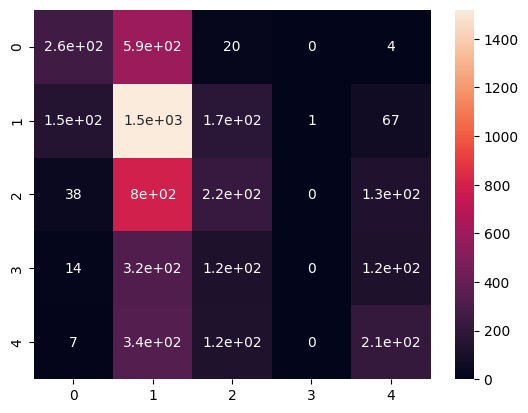

In [20]:
print('\n Logistic Regression Model')

# Baseline Model
clf = LogisticRegression(multi_class='multinomial')
clf.fit(X_train, y_train)

y_pred_train = clf.predict(X_train)
train_acc = accuracy_score(y_train, y_pred_train)
print("Training Accuracy:", train_acc)

y_pred = clf.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)
print("Testing Accuracy:", test_acc)

precision_m1, recall_m1, f1_m1 = calculate_metrics(y_test, y_pred)

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
print('\nGrid Search')

# After GridSearchCV
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 0.01, 0.001, 0.05, 0.005, 0.5, 1, 5, 10, 25, 50, 100],
    'solver': ['liblinear', 'saga', 'newton-cg']
}

grid_search = GridSearchCV(estimator = clf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)

y_pred_train_g = grid_search.best_estimator_.predict(X_train)
train_acc_g = accuracy_score(y_train, y_pred_train_g)
print("After Grid Search Training Accuracy:", train_acc_g)

y_pred_g = grid_search.best_estimator_.predict(X_test)
test_acc_g = accuracy_score(y_test, y_pred_g)
print("After Grid Search Testing Accuracy:", test_acc_g)

precision_m1_g, recall_m1_g, f1_m1_g = calculate_metrics(y_test, y_pred_g)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_g)
sn.heatmap(conf_matrix, annot=True)

## 3.2 K Nearest Neighbor


 K Nearest Neighbor
Training Accuracy: 0.7114497212074601
Testing Accuracy: 0.600845991155547
Precision: 0.5987521721623861
Recall: 0.600845991155547
F1 score: 0.5974303428595016

Grid Search
Best hyperparameters: {'n_neighbors': 4}
After Grid Search Training Accuracy: 0.7336569890405691
After Grid Search Testing Accuracy: 0.5977696596808306
Precision: 0.592966467857208
Recall: 0.5977696596808306
F1 score: 0.592816645132069


<Axes: >

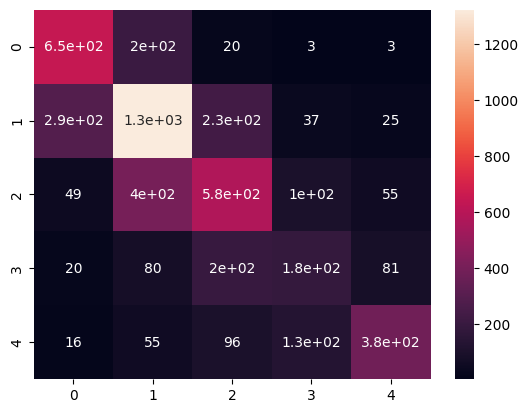

In [21]:
print('\n K Nearest Neighbor')

# Baseline Model
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

y_pred_train = clf.predict(X_train)
train_acc = accuracy_score(y_train, y_pred_train)
print("Training Accuracy:", train_acc)

y_pred = clf.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)
print("Testing Accuracy:", test_acc)

precision_m2, recall_m2, f1_m2 = calculate_metrics(y_test, y_pred)

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
print('\nGrid Search')

# After GridSearchCV
param_grid = { "n_neighbors" : np.arange(2,14,1)}

grid_search = GridSearchCV(estimator = clf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)

y_pred_train_g = grid_search.best_estimator_.predict(X_train)
train_acc_g = accuracy_score(y_train, y_pred_train_g)
print("After Grid Search Training Accuracy:", train_acc_g)

y_pred_g = grid_search.best_estimator_.predict(X_test)
test_acc_g = accuracy_score(y_test, y_pred_g)
print("After Grid Search Testing Accuracy:", test_acc_g)

precision_m2_g, recall_m2_g, f1_m2_g = calculate_metrics(y_test, y_pred_g)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_g)
sn.heatmap(conf_matrix, annot=True)

## 3.3 Decision Tree


 Decision Tree
Training Accuracy: 0.9827437031340127
Testing Accuracy: 0.5950778696404537
Precision: 0.5963820706314237
Recall: 0.5950778696404537
F1 score: 0.5956340010676786

Grid Search
Best hyperparameters: {'criterion': 'gini', 'max_depth': 12, 'min_samples_leaf': 2, 'min_samples_split': 12}
After Grid Search Training Accuracy: 0.7159200153816574
After Grid Search Testing Accuracy: 0.6116131513170544
Precision: 0.6078813692316009
Recall: 0.6116131513170544
F1 score: 0.6082987261328298


<Axes: >

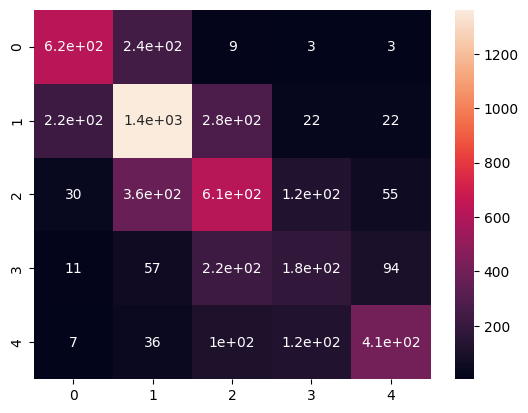

In [22]:
print('\n Decision Tree')

# Baseline Model
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_pred_train = clf.predict(X_train)
train_acc = accuracy_score(y_train, y_pred_train)
print("Training Accuracy:", train_acc)

y_pred = clf.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)
print("Testing Accuracy:", test_acc)

precision_m3, recall_m3, f1_m3 = calculate_metrics(y_test, y_pred)

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

print('\nGrid Search')

# After GridSearchCV
param_grid = { "criterion" : ["gini", "entropy"], "max_depth" : np.arange(2,14,2), "min_samples_split" : np.arange(2,14,2), "min_samples_leaf": np.arange(2, 14, 2)}

grid_search = GridSearchCV(estimator = clf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)

y_pred_train_g = grid_search.best_estimator_.predict(X_train)
train_acc_g = accuracy_score(y_train, y_pred_train_g)
print("After Grid Search Training Accuracy:", train_acc_g)

y_pred_g = grid_search.best_estimator_.predict(X_test)
test_acc_g = accuracy_score(y_test, y_pred_g)
print("After Grid Search Testing Accuracy:", test_acc_g)

precision_m3_g, recall_m3_g, f1_m3_g = calculate_metrics(y_test, y_pred_g)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_g)
sn.heatmap(conf_matrix, annot=True)

# Summary and Results

ValueError: ignored

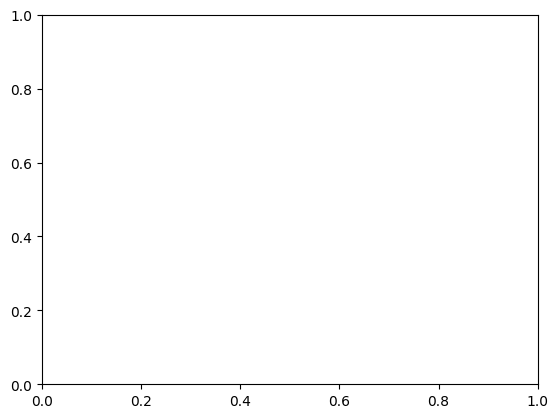

In [27]:
# Define the data
algorithms = ['Logistic Regression', 'K Nearest Neighbor', 'Decision Tree']
accuracy = [0.4254950970967122, 0.5977696596808306, 0.6116131513170544]
precision = [0.3745500548115929, 0.592966467857208, 0.6078813692316009]
recall = [0.4153047490867141, 0.5977696596808306, 0.6116131513170544]
f1_score=[0.34366779250447255, 0.592816645132069, 0.6082987261328298]


# Set the width of each bar and the opacity
bar_width = 0.25
opacity = 0.8

# Create the bar chart
fig, ax = plt.subplots()
ax.bar([0, 1, 2,3], accuracy, bar_width, alpha=opacity, label='Accuracy')
ax.bar([x + bar_width for x in [0, 1, 2,3]], precision, bar_width, alpha=opacity, label='Precision')
ax.bar([x + bar_width*2 for x in [0, 1, 2,3]], recall, bar_width, alpha=opacity, label='Recall')
ax.bar([x + bar_width*3 for x in [0, 1, 2, 3]], f1_score, bar_width, alpha=opacity, label='F1 Score')

# Add labels and title
ax.set_xlabel('Algorithms')
ax.set_ylabel('Scores')
ax.set_title('Comparison of three algorithms in ML')
ax.set_xticks([0.25, 1.25, 2.25])
ax.set_xticklabels(algorithms)

# Add a legend
ax.legend()

plt.show()

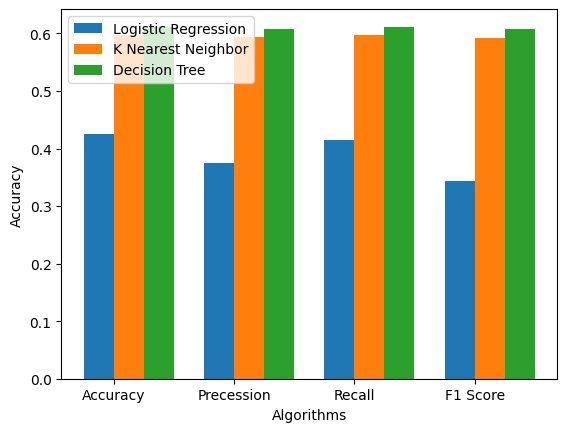

In [31]:
# Data for the chart
algorithm_names = ['Logistic Regression', 'K Nearest Neighbor', 'Decision Tree']
data_names = ['Accuracy', 'Precession', 'Recall', 'F1 Score']
accuracy_data = np.array([[0.4254950970967122, 0.5977696596808306, 0.6116131513170544], [0.3745500548115929, 0.592966467857208, 0.6078813692316009], [0.4153047490867141, 0.5977696596808306, 0.6116131513170544], [0.34366779250447255, 0.592816645132069, 0.6082987261328298]])

# Set the width of each bar
bar_width = 0.25

# Set the x positions of the bars
x_positions = np.arange(len(data_names))

# Create the chart
fig, ax = plt.subplots()
for i in range(len(algorithm_names)):
    ax.bar(x_positions + i * bar_width, accuracy_data[:, i], width=bar_width, label=algorithm_names[i])

# Set the axis labels and legend
ax.set_xlabel('Algorithms')
ax.set_ylabel('Accuracy')
ax.set_xticks(x_positions + bar_width / 2)
ax.set_xticklabels(data_names)
ax.legend()

# Show the chart
plt.show()

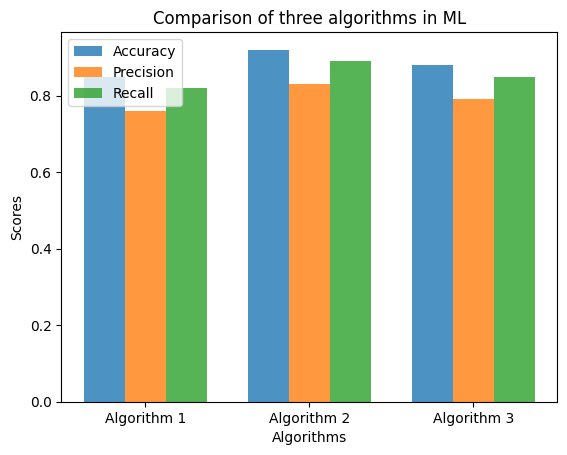

In [24]:
algorithms = ['Algorithm 1', 'Algorithm 2', 'Algorithm 3']
accuracy = [0.85, 0.92, 0.88]
precision = [0.76, 0.83, 0.79]
recall = [0.82, 0.89, 0.85]

# Set the width of each bar and the opacity
bar_width = 0.25
opacity = 0.8

# Create the bar chart
fig, ax = plt.subplots()
ax.bar([0, 1, 2], accuracy, bar_width, alpha=opacity, label='Accuracy')
ax.bar([x + bar_width for x in [0, 1, 2]], precision, bar_width, alpha=opacity, label='Precision')
ax.bar([x + bar_width*2 for x in [0, 1, 2]], recall, bar_width, alpha=opacity, label='Recall')

# Add labels and title
ax.set_xlabel('Algorithms')
ax.set_ylabel('Scores')
ax.set_title('Comparison of three algorithms in ML')
ax.set_xticks([0.25, 1.25, 2.25])
ax.set_xticklabels(algorithms)

# Add a legend
ax.legend()

plt.show()